     | 0/32 [00:00<?, ?it/s]
100%|██████████| 100/100 [01:51<00:00,  1.11s/it]


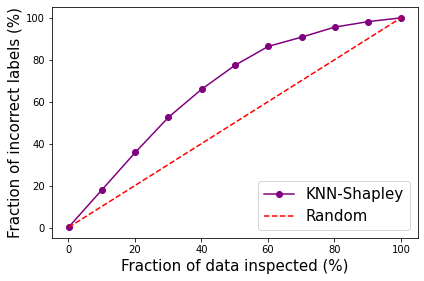

In [1]:
from models.resnet import ResNet 
from shapley.dshap import DShap 
from utils.dataset import FashionMNISTDataModule
from shapley.knn_shapley import KNNShapley
from utils.plotter import LabelPlotter

dm = FashionMNISTDataModule() 
dm.setup() 

model = ResNet()

measure = KNNShapley()

dshap = DShap(dm, model, measure=measure, device="cpu")
scores = dshap.run() 

plotter = LabelPlotter(dm, ("KNN-Shapley", scores))
plotter.plot()

In [2]:
scores

tensor([ 7.8188e-04,  2.6894e-04,  5.2093e-04,  7.2462e-03, -3.1076e-03,
         5.5938e-03,  5.8835e-04,  3.5748e-03,  7.2446e-04,  7.5058e-04,
         2.8189e-04,  1.3535e-03,  4.1003e-03,  3.5914e-03,  6.6233e-04,
         1.5067e-04,  4.4535e-04, -1.2880e-03,  5.7733e-04, -4.9443e-04,
         1.0386e-03, -2.7403e-03,  5.2993e-04, -1.3662e-03,  8.5015e-03,
         8.6648e-04,  3.7783e-04,  7.8190e-04, -4.3507e-03, -1.6834e-03,
         4.8876e-03,  7.8314e-05,  7.6247e-04,  1.1470e-03,  4.2922e-04,
         5.8983e-04,  1.5696e-04, -2.9206e-03, -6.4833e-04,  4.4604e-04,
        -2.1412e-05,  4.9729e-04,  3.5043e-04,  3.1906e-04, -2.4642e-04,
         4.7657e-04,  4.0044e-03,  2.2658e-04,  7.9788e-04, -6.3429e-03,
         6.0009e-04,  2.6723e-04,  5.2354e-04,  1.5485e-04,  8.7193e-04,
         4.2278e-04,  2.5071e-04,  1.0392e-03,  4.0850e-04,  4.7335e-04,
         3.9844e-03,  5.2024e-04,  1.0450e-03,  8.9806e-04,  1.6328e-03,
         4.9108e-04,  7.9940e-04,  1.1484e-03, -2.5